# Least squares

We just collected the census data for Canada

Let us load it (from the save we made) and plot it..

Recall that in the video, I describe $y=ax+b$, whereas here I have adapted everything to read $y=a+bx$. Also serves to show that this makes very little difference!

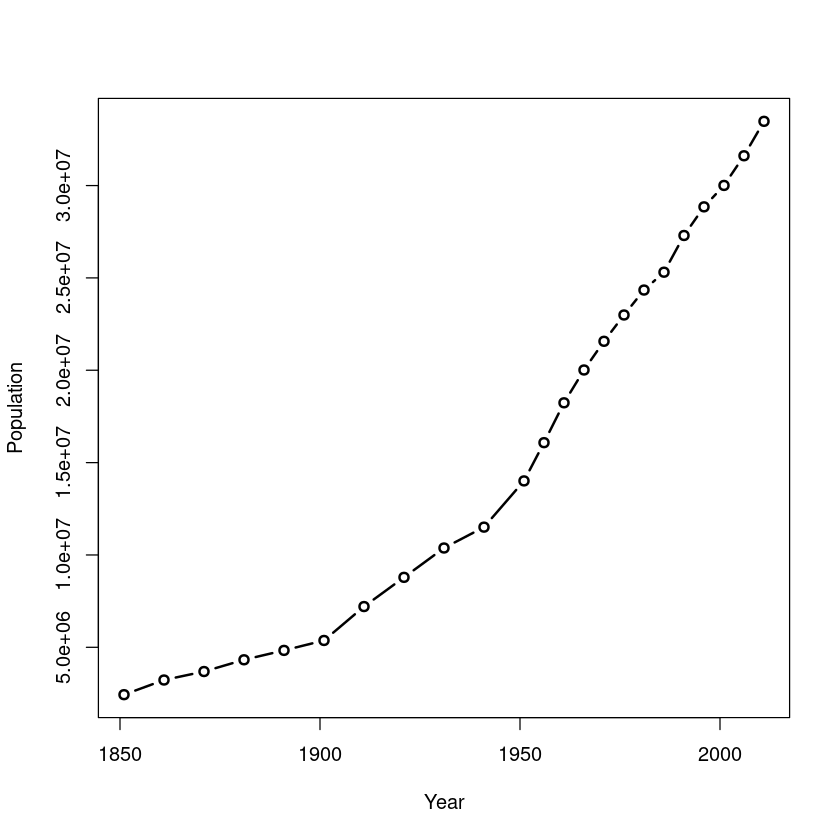

In [12]:
data = read.csv("Canada_census.csv")
plot(data$year, data$population,
    type = "b",
    lwd = 2,
    xlab = "Year",
    ylab = "Population")

Suppose we want to predict the population in 20 years given the historical population growth seen in the previous plot. What can we do?

If there were just two points, we could easily "drive" a line through these two points. However, we have much more than two points, so we will use "fitting", *i.e.*, we will try to make a curve come as close to possible to the points

We start with a line, giving rise to **linear least squares**

# Least squares approximation
Let us start with a simple case..

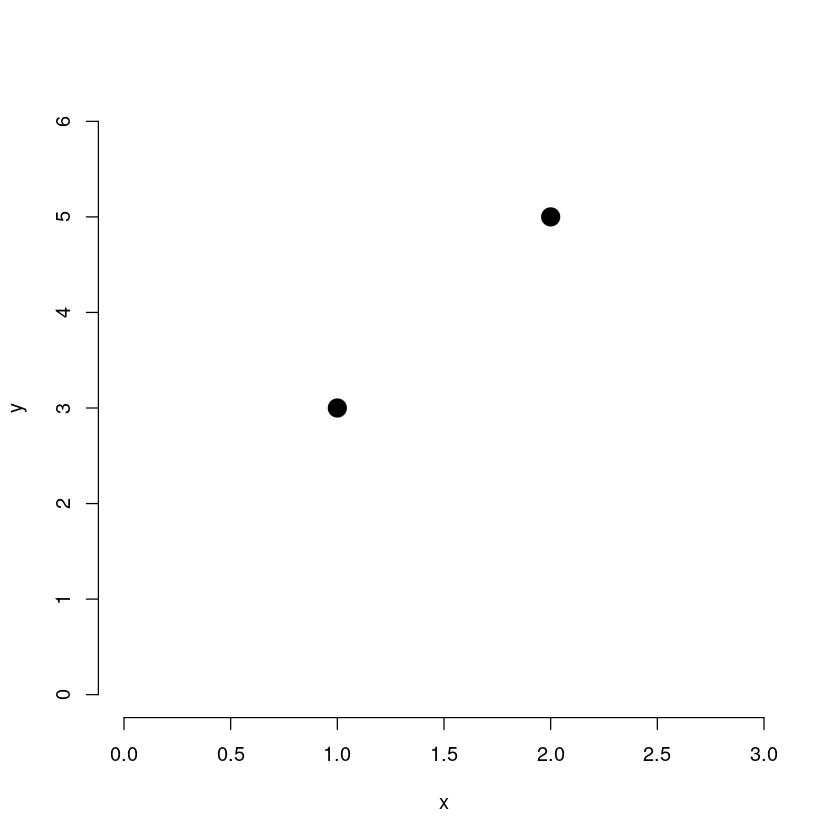

In [13]:
points = list()
points$x = c(1,2)
points$y = c(3,5) # So the points are (1,3) and (2,5)
plot(points$x, points$y, 
     pch = 19, cex = 2, bty = "n",
    xlim = c(0, 3), ylim = c(0,6), xlab = "x", ylab = "y")

We want to find the equation of a line $y=a+bx$ that goes through these two points, i.e., we seek $a$ and $b$ such that
$$
\begin{aligned}
3 &= a+b \\
5 &= a+2b
\end{aligned}
$$
i.e., they satisfy $y=a+bx$ for $(x,y)=(1,3)$ and $(x,y)=(2,5)$

This is a linear system with 2 equations and 2 unknowns $a$ and $b$
$$
\begin{pmatrix}
1 & 1 \\ 1 & 2
\end{pmatrix}
\begin{pmatrix}
a \\ b
\end{pmatrix}
=
\begin{pmatrix}
3 \\ 5
\end{pmatrix}
$$

We know from the "famous" Linear algebra in a nutshell theorem that this system has a unique solution if the matrix
$$
M=
\begin{pmatrix}
1 & 1 \\ 1 & 2
\end{pmatrix}
$$
is invertible

$\det(M)=1$, so we are good, we'll find $a$ and $b$ easily..

Now let's add another point

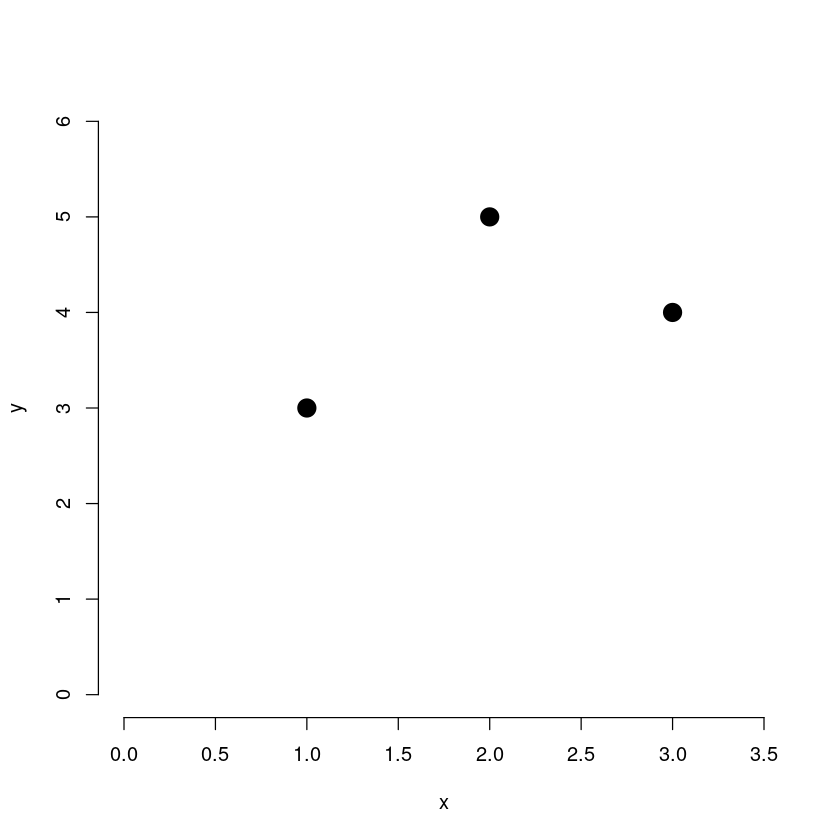

In [14]:
points = list()
points$x = c(1,2,3)
points$y = c(3,5,4) # So the points are (1,3), (2,5) and (3,4)
plot(points$x, points$y, 
     pch = 19, cex = 2, bty = "n",
    xlim = c(0, 3.5), ylim = c(0,6), xlab = "x", ylab = "y")

These points are clearly not colinear, so there is not one line going through the 3

We end up with an *overdetermined* system
$$
\begin{aligned}
3 &= a+b \\
5 &= a+2b \\
4 &= a+3b
\end{aligned}
$$
i.e.,
$$
\begin{pmatrix}
1 & 1 \\ 1 & 2 \\ 1 & 3
\end{pmatrix}
\begin{pmatrix}
a \\ b
\end{pmatrix}
=
\begin{pmatrix}
3 \\ 5 \\ 4
\end{pmatrix}
$$

We have verified visually that the points are not colinear, so this system has no solution 

(If you had to do it for good, you consider two vectors stemming from these 3 points and compute the angle between them or check that one is a multiple of the other)

So let us instead try to find the line that comes "closest" to the 3 points

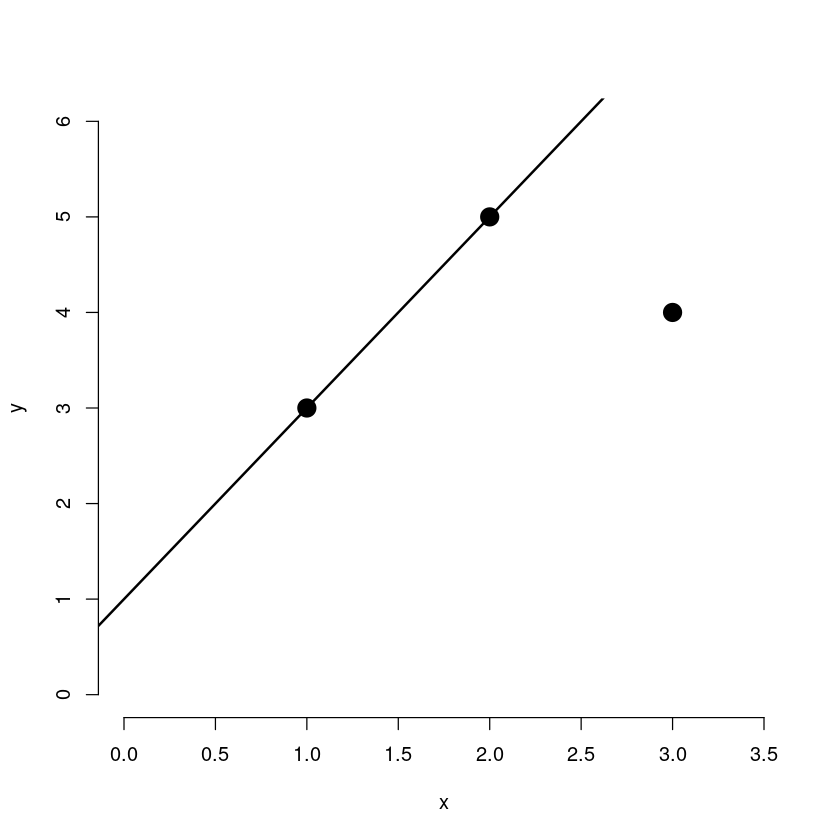

In [15]:
A = matrix(c(1,1,1,2), nr = 2, nc = 2, byrow = TRUE)
rhs = matrix(c(3,5), nr = 2, nc =1)
coefs = solve(A,rhs) # To invert A, in R, you use solve(A), to solve Ax=b, you use solve(A,b)
plot(points$x, points$y, 
     pch = 19, cex = 2, bty = "n",
    xlim = c(0, 3.5), ylim = c(0,6), xlab = "x", ylab = "y")
abline(coef = coefs, lwd = 2)

Obviously, not sensational..

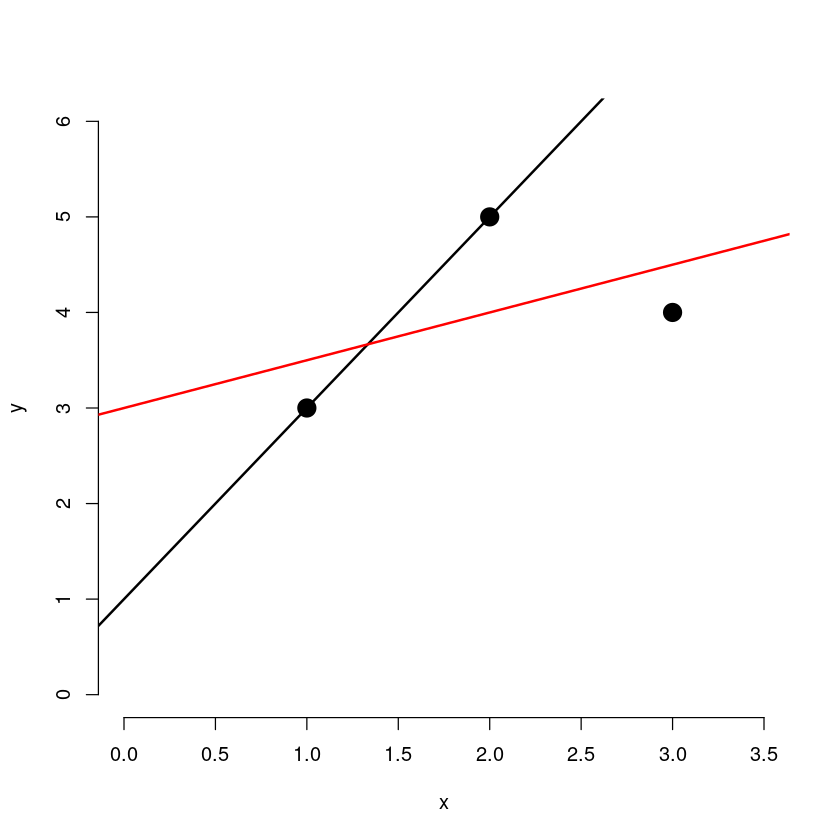

In [16]:
plot(points$x, points$y, 
     pch = 19, cex = 2, bty = "n",
    xlim = c(0, 3.5), ylim = c(0,6), xlab = "x", ylab = "y")
abline(coef = coefs, lwd = 2) 
abline(a = 3, b = 0.5, lwd = 2, col = "red")

How do we find "how far away"? 

- We could use projections onto the line (which we know minimises the distance)
- However, this will be a problem if we later decide that rather than a straight line, we want to use something more "funky" like a quadratic or an exponential

So instead, we compare, for a given value $x$, the distance between the true value $y$ and the value of $y$ obtained using the curve (line, here) that we use to fit the data



Let $(x_i,y_i)$ be the data points, i.e., here, $(x_1,y_1)=(1,3)$, $(x_2,y_2)=(2,5)$ and $(x_3,y_3)=(3,4)$

Now suppose we use a line with equation $y=a+bx$ and that we pick a value for $a$ and $b$. Then at $x_1$,
$$
\tilde y_1 = a+bx_1 = a+b
$$
at $x_2$
$$
\tilde y_2 = a+bx_2 = a+2b
$$
and at $x_3$,
$$
\tilde y_3 = a+bx_3 = a+3b
$$
Consider $x_1$, for instance. The error we made by using the line with coefficients $(a,b)$ is $\overrightarrow{(x_1,y_1)(x_1,\tilde y_1)}$

For future use, let us create a function for $y = a_0 + a_1x$

In [17]:
my_line = function(x, a_0, a_1) {
    return(a_0 + a_1*x)
}

Functions are super useful when programming

In [18]:
my_line(1,2,3)
my_line(a_0 = 2, a_1 = 3, x = 1)
my_line(x = c(1,2,3), a_0 = 2, a_1 = 3)

[1] 5

[1] 5

[1]  5  8 11

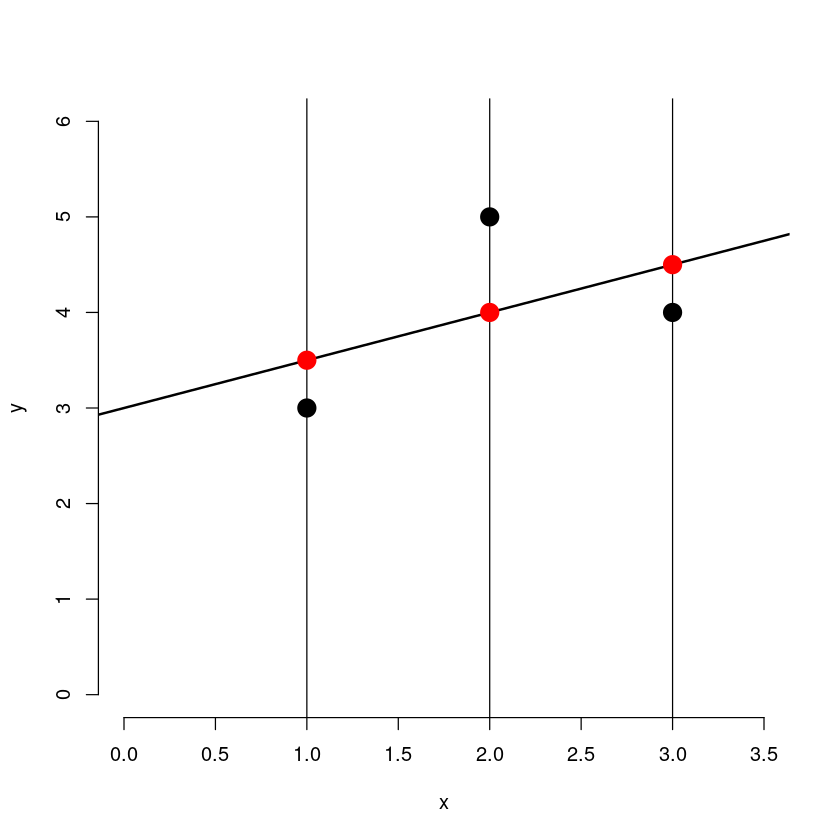

In [19]:
a = 3
b = 0.5 # The line has equation y=a+bx
plot(points$x, points$y, 
     pch = 19, cex = 2, bty = "n",
    xlim = c(0, 3.5), ylim = c(0,6), xlab = "x", ylab = "y")
abline(a = a, b = b, lwd = 2)
abline(v = c(1,2,3))  # If we used abline(h=c(0,1)), we would get horizontal lines at y=0 and y=1
p = my_line(c(1,2,3), a, b)
points(c(1,2,3), p, pch = 19, cex = 2, col = "red")

Let us return to the error
$$
\overrightarrow{(x_1,y_1)(x_1,\tilde y_1)}
$$
We have
$$
\overrightarrow{(x_1,y_1)(x_1,\tilde y_1)}
= (x_1-x_1,y_1-\tilde y_1)
= (0, y_1-\tilde y_1)
$$
Let us call 
$$
\varepsilon_1 = y_1-\tilde y_1
$$
We can compute $\varepsilon_2$ and $\varepsilon_3$ too. And we can then form the **error vector**
$$
\mathbf{e} = (\varepsilon_1,\varepsilon_2,\varepsilon_3)^T
$$
The norm of $\mathbf{e}$, $\|\mathbf{e}\|$, then tells us how much error we are making for the choice of $(a,b)$ we are using

The norm of $\mathbf{e}$, $\|\mathbf{e}\|$, tells us how much error we are making for the choice of $(a,b)$ we are using

So our objective is to find $(a,b)$ such that $\|\mathbf{e}\|$ is minimal

We could use various norms, but the Euclidean norm has some very interesting properties, so we use
$$
\|\mathbf{e}\| = \sqrt{\varepsilon_1^2+\varepsilon_2^2+\varepsilon_3^2}
$$


# The linear least squares problem
Given a collection of data points $(x_1,y_1),\ldots,(x_n,y_n)$, find the coefficients $a,b$ of the line $y=a+bx$ such that
$$
\|\mathbf{e}\|=\sqrt{\varepsilon_1^2+\cdots+\varepsilon_n^2}
=\sqrt{(y_1-\tilde y_1)^2+\cdots+(y_n-\tilde y_n)^2}
$$
is minimal, where $\tilde y_i=a+bx_i$, for $i=1,\ldots,n$

Let us first hack a brute force solution! (For the example we have been using this far)

We have our three points in the list `points`, the function `my_line` that computes the value $\tilde y$ given $x$ and $a,b$, so let us make a new function that, given $a,b$, computes $\mathbf{e}$

We'll also pass the points `points`

In [20]:
error = function(a_0, a_1, points) {
    y_tilde = my_line(points$x, a_0 = a_0, a_1 = a_1)
    e = points$y - y_tilde
    return(sqrt(sum(e^2)))
}
error(a_0 = 2, a_1 = 3, points)
error(a_0 = 3, a_1 = 0.5, points)
error(a_0 = 3.1, a_1 = 0.48, points)

[1] 7.874008

[1] 1.224745

[1] 1.229471

We can't be doing this by hand.. 

Let's use something cool: a *genetic algorithm*

# Genetic algorithms
- Genetic algorithms are a stochastic *optimisation* method. There are other types, e.g., gradient descent (deterministic)
- The idea is to use a mechanism mimicking evolution's drive towards higher fitness
- The function value is its fitness
- We try different genes (here, different values of $a,b$) and evaluate their fitness.. keep the good ones
- We mutate or crossover genes, throw in new ones, etc.

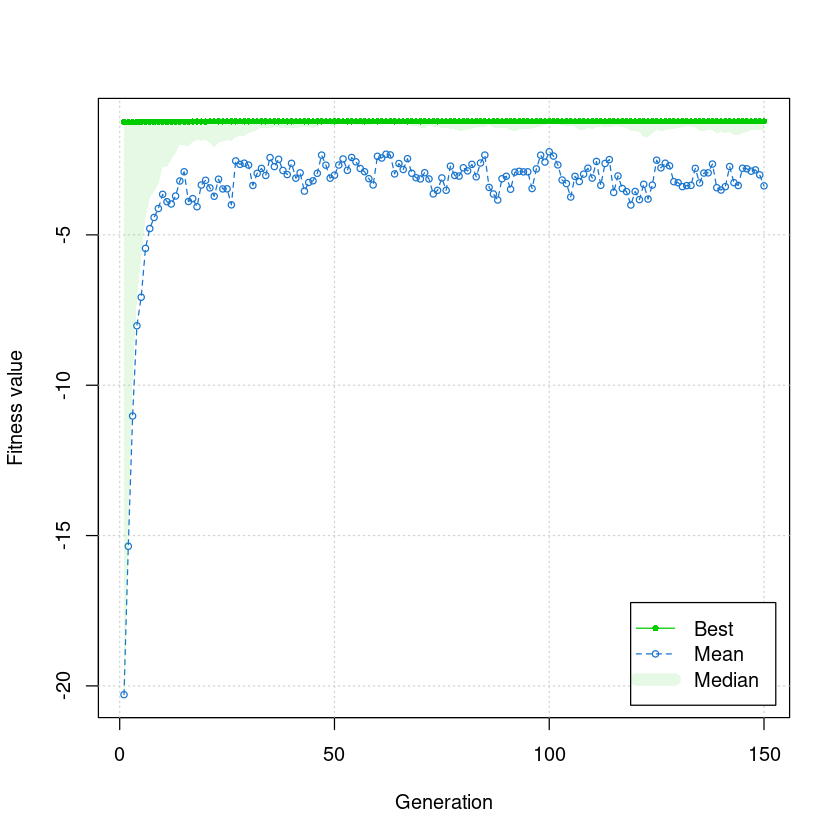

In [21]:
#install.packages("GA")
library(GA)
GA = ga(type = "real-valued", 
        fitness = function(x) -error(a_0 = x[1], a_1 = x[2], points),
        suggestions = c(a_0 = 2, a_1 = 3),
        lower = c(0, 0), upper = c(10, 10),
        popSize = 200, maxiter = 150)
plot(GA)

In [22]:
GA
GA@solution
-GA@fitnessValue

An object of class "ga"

Call:
ga(type = "real-valued", fitness = function(x) -error(a_0 = x[1],     a_1 = x[2], points), lower = c(0, 0), upper = c(10, 10),     popSize = 200, maxiter = 150, suggestions = c(a_0 = 2, a_1 = 3))

Available slots:
 [1] "call"         "type"         "lower"        "upper"        "nBits"       
 [6] "names"        "popSize"      "iter"         "run"          "maxiter"     
[11] "suggestions"  "population"   "elitism"      "pcrossover"   "pmutation"   
[16] "optim"        "fitness"      "summary"      "bestSol"      "fitnessValue"
[21] "solution"    

x1,x2
3.000315,0.4997947


[1] 1.224745

- Here, however, we do not have to go brute force: we can reason using mathematics
- We now take a little detour on the math side of things, we will come back to code in a while..